<a href="https://colab.research.google.com/github/rainforest01-coder/ESAA_files/blob/main/ESAA_WEEK12_1%EC%B0%A8%EC%9B%90%EC%B6%95%EC%86%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#01 차원축소
차원이 증가할수록 데이터 포인트간의 거리 기하급수적으로 멀어짐

피처가 많을 경우 개별 피처간에 상관관계가 높을 가능성 커 다중동선성 문제로 예측 성능 저하

* 피처 선택: 특정 피처에 종속성이 강한 불필요한 피처 제거
* 피처 추출: 기존 피처를 저차원의 중요 피처로 압축해서 추출(기존 피처와 완전히 다른 값)/피처를 더 잘 설명할 수 있는 또 다른 공간으로 매핑해 추출/데이터를 잘 설명할 수 있는 잠재적 요소 추출
> PCA, SVD, NMF
> 이미지 분류 등의 수행시 과적합 영향력이 작아져 성능 상승
> 텍스트 문서의 숨겨진 의미 추출

#02 PCA(Principal Component Analysis

##PCA 개요
여러 변수간에 존재하는 상관관계를 이용해 이를 대표하는 주성분을 추출해 차원 축소

분산이 가장 큰 데이터의 축을 찾아 이 축으로 차원 축소

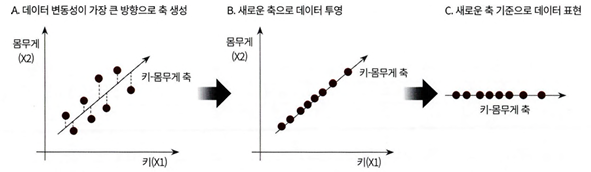

가장 먼저 가장 큰 데이터 변동성을 기반으로 첫번째 벡터 축을 생성하고 두번째 축은 이벡터 축에 직각이 되는 벡터를 축으로 함 세번째 축은 다시 두 번째 축과 직각이 되는 벡터 설정
> 생성된 벡터 축에 원본 데이터 투영하면 벡터 축의 개수만큼의 차원으로 원본 데이터 차원 축소
* 선형대수 관점  
입력 데이터의 공분산 행렬을 고유값 분해하고 이렇게 구한 고유 벡터에 입력 데이터를 선형 변환하는 것  
고유벡터: PCA주성분  / 행렬 A를 곱하더라도 방향이 변하지 않고 크기만 변함/ 고유벡터 여러개 존재/ 정방 행렬은 차원수만큼 가질 수 있음(2x2:2개/3x3:3개)
고윳값: 이 고유벡터의 크기, 입력 데이터의 분산

선형변환: 특정 벡터에 행렬A를 곱해 새로운 벡터로 변환  특정 벡터를 하나의 공간에서 다른 공간으로 투영하는 개념  
이 경우 이 행렬의 바로 공가능로 가정

공분산: 두 변수간의 변동/ ex 사람키 X 몸무게 Y라고하면 공분산 X,Y>0이면 키가 증가할 때 몸무게도 증가/ 공분산 행렬은 여러 변수와 관련된 공분산을 포함하는 정방형 행렬

공분산 행렬: 정방행렬이며 대칭 행렬 >>고유벡터를 직교 행렬로, 고유값을 정방 행렬로 대각화 가능

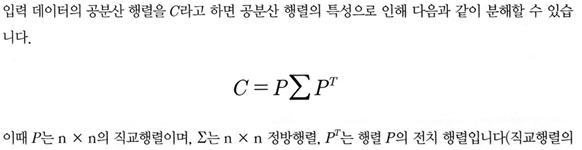

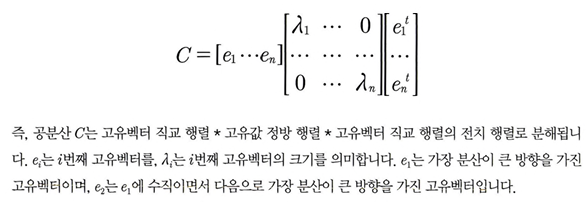



1. 입력 데이터 세트의 공분산 행렬 생성
2. 공분산 행렬의 고유벡터와 고유값 계산
3. 고유값이 가장 큰순으로 K개(PCA변환 차수) 만큼 고유벡터 추출
4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터 변환

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

iris=load_iris()
columns=['sepal_length','sepal_width','petal_length','petal_width']
irisDF=pd.DataFrame(iris.data,columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


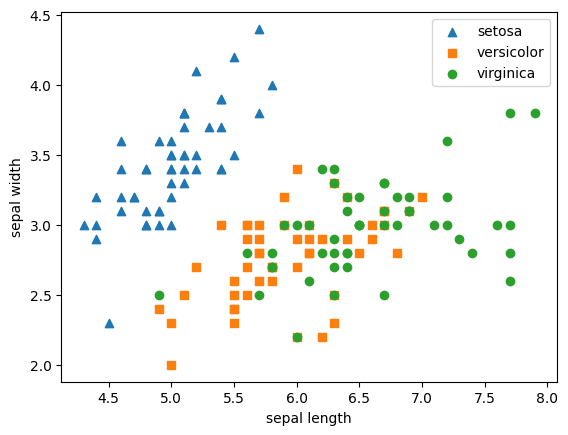

In [6]:
markers=['^','s','o']
for i, marker in enumerate(markers):
  x_axis_data=irisDF[irisDF['target']==i]['sepal_length']
  y_axis_data=irisDF[irisDF['target']==i]['sepal_width']
  plt.scatter(x_axis_data,y_axis_data,marker=marker, label=iris.target_names[i])
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()


4개의 속성을 2개로 압축한 뒤 시각화

동일한 스케일로 개별 송성을 함께 스케일링 해줘야함

In [7]:
from sklearn.preprocessing import StandardScaler
iris_scaled=StandardScaler().fit_transform(irisDF.iloc[:,:-1])
#target값 제외 스케일링

In [8]:
#4>2차원
#n_component=변환할 차원의 수
from sklearn.decomposition import PCA
pca=PCA(n_components=2)

pca.fit(iris_scaled)
iris_pca=pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [9]:
#값 확인

pca_columns=['pca_component_1','pca_component_2']
irisDF_pca=pd.DataFrame(iris_pca,columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


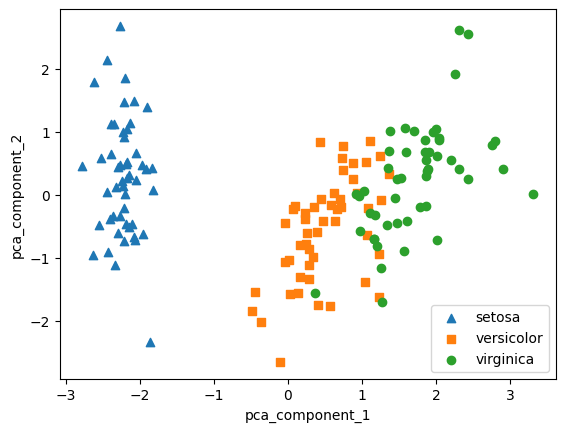

In [11]:
markers=['^','s','o']
for i, marker in enumerate(markers):
  x_axis_data=irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
  y_axis_data=irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
  plt.scatter(x_axis_data,y_axis_data,marker=marker, label=iris.target_names[i])
plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

변동성 잘 반영, setosa품종 명확히 구분 나머지는 일부만 겹쳐서 비교적 구분 잘됨

컴포넌트별 원본 데이터의 변동성을 얼마나 반영하고 있는지 알아보기

In [12]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


comp1이 72.8%차지, 두번째가 22% 차지

두개의 요소로 약 95% 설명 가능

원본과 변환된 데이터의 분류 성능

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf=RandomForestClassifier(random_state=156)
scores=cross_val_score(rcf,iris.data,iris.target,scoring='accuracy',cv=3)
print('원본 데이터 교차 검증 개별 정확도:',scores)
print('원본 데이터 평균 정확도:',np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


In [15]:
pca_X=irisDF_pca[['pca_component_1','pca_component_2']]
scores_pca=cross_val_score(rcf,pca_X,iris.target,scoring='accuracy',cv=3)
print('원본 데이터 교차 검증 개별 정확도:',scores_pca)
print('원본 데이터 평균 정확도:',np.mean(scores_pca))


원본 데이터 교차 검증 개별 정확도: [0.88 0.88 0.88]
원본 데이터 평균 정확도: 0.88


속성 개수가 절반 감소한 것을 고려하면 원본 데이터 특성을 상딩 부분 유지하고 있음을 알 수 있음

좀더 많은 피처 가진 신용카드 고객 데이터 세트

In [26]:
import pandas as pd

df=pd.read_excel('pca_credit_card.xls',header=1,sheet_name='Data').iloc[0:,1:]
print(df.shape)
df.head(3)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [30]:
#긴 칼럼명 변경
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'},inplace=True)
y_target=df['default']
X_features=df.drop('default',axis=1,inplace=False)

<Axes: >

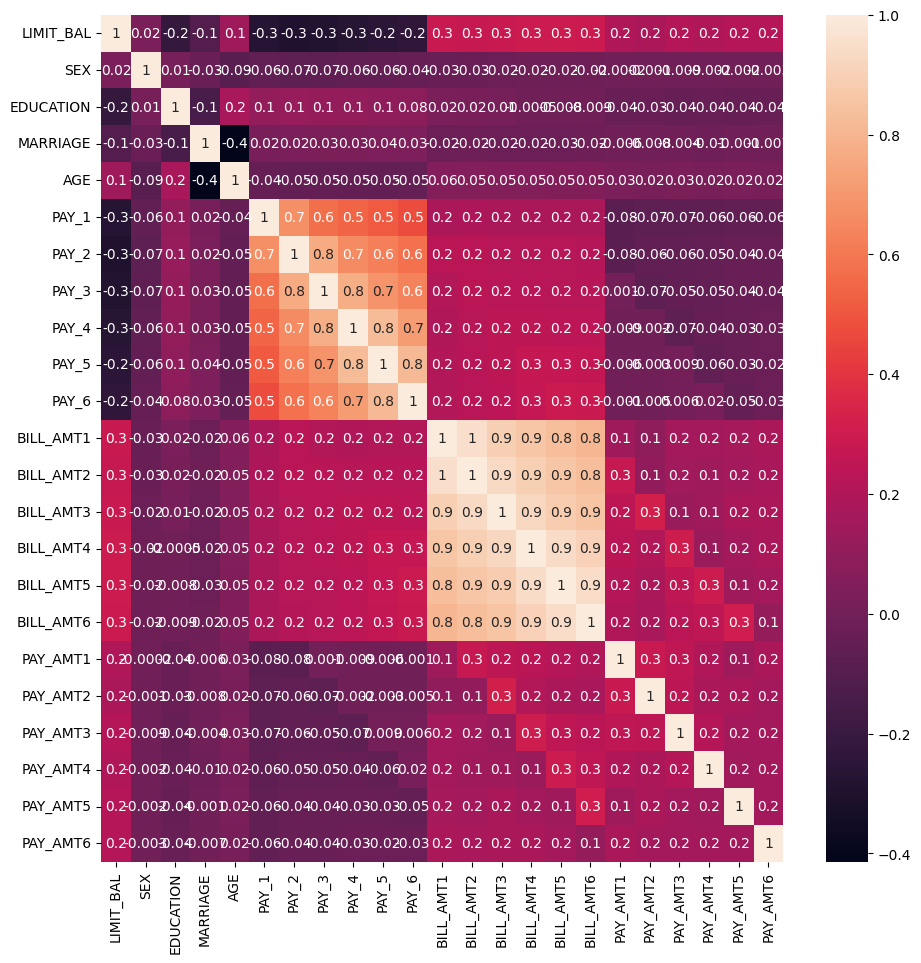

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr=X_features.corr()
plt.figure(figsize=(11,11))
sns.heatmap(corr,annot=True,fmt='.1g')

BILL_
AMT1 〜 BILL_AMT6까지 6개 속성을 2개의 컴포넌트로 PCA 변환한 뒤 개별 컴포넌트의 변동성을
explainedjvariance_ratio_속성으로 알아보기

In [32]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

cols_bill=['BILL_AMT'+str(i) for i in range(1,7)]
print('대상 속성명:',cols_bill)

scaler=StandardScaler()
df_cols_scaled=scaler.fit_transform(df[cols_bill])
pca=PCA(n_components=2)
pca.fit(df_cols_scaled)
print('PCA Component별 변동성',pca.explained_variance_ratio_)

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성 [0.90555253 0.0509867 ]


두개 컴포넌트로 약 95%의 변동성 설명

분류 예측 결과 상호 비교

In [33]:
rcf=RandomForestClassifier(n_estimators=300,random_state=156)
scores=cross_val_score(rcf,X_features,y_target,scoring='accuracy',cv=3)

print('CV=3인 경우 개별 Fold세트별 정확도:',scores)
print('평균 정확도: {0:.4f}'.format(np.mean(scores)))

CV=3인 경우 개별 Fold세트별 정확도: [0.8083 0.8196 0.8232]
평균 정확도: 0.8170


In [35]:
scaler=StandardScaler()
df_scaled=scaler.fit_transform(X_features)

pca=PCA(n_components=6)
df_pca=pca.fit_transform(df_scaled)
scores_pca=cross_val_score(rcf,df_pca,y_target,scoring='accuracy',cv=3)
print('CV=3인 경우 PCA 변환된 개별 Fold세트별 정확도:',scores_pca)
print('PCA 변환평균 정확도: {0:.4f}'.format(np.mean(scores_pca)))

CV=3인 경우 PCA 변환된 개별 Fold세트별 정확도: [0.7912 0.7974 0.802 ]
PCA 변환평균 정확도: 0.7969


전체 속성의 1/4 정도만으로도 이 정도 수치의 예측 성능을 유지할 수 있다는
것은 PCA의 뛰어난 압축 능력을 잘 보여주는 것

#03 LDA(Linear Discirminant Analysis)

##LDA개요
선형 판별 분석법으로 불리며 PCA와 매우 유사

입력 데이터 세트를 저차원 공간에 투영해 차원을 축소하는 기법이지만 큰 차이는 분류학습에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원축소

입력 데이터의 결정 값 클래스를 최대한 분리할 수 있는 축을 찾음

특정 공간상에서 클래스 분리를 최대화하는 축을 찾기 위해 클래스간 분산과 클래스 내부 분산의 비율을 최대화하는 방식으로 차원 축소

즉 클래스간 분산은 최대한 키우고 클래스 내부의 분산은 최대한 작게 가져가는 방식

공분산 행렬이 아니라 클래스간 분산과 클래스 내부 분산 행렬을 생성한 뒤 이 행렬에 기반해 고유벡터를 구하고 입력 데이터 투영

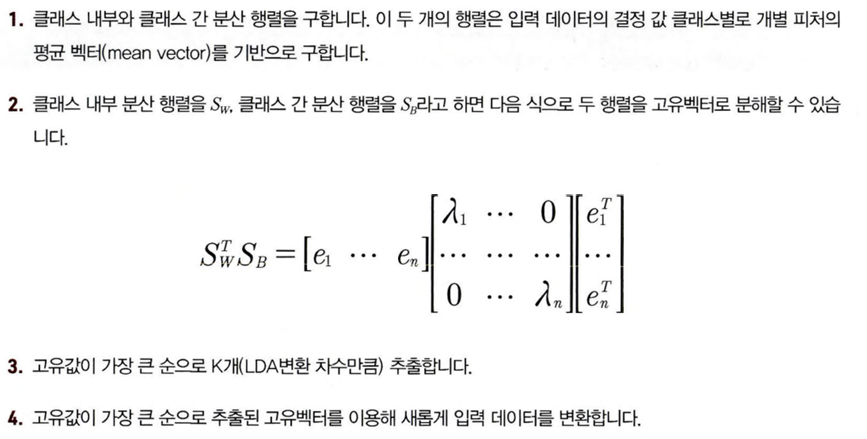

##붓꽃 데이터 세트에 적용하기

*유의: PCA와 다르게 지도학습
> 클래스의 결정값이 변환시 필요

In [37]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
iris=load_iris()
iris_scaled=StandardScaler().fit_transform(iris.data)

In [38]:
lda=LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled,iris.target)
iris_lda=lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


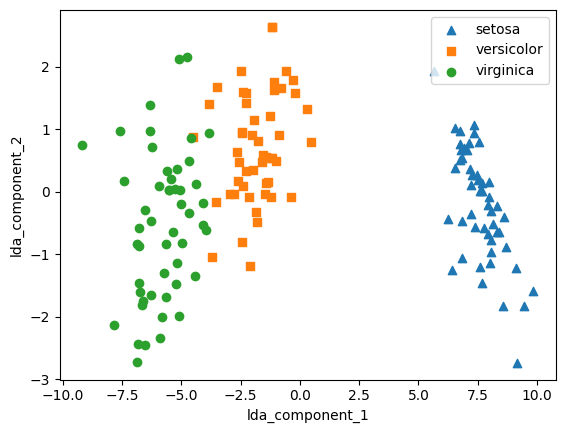

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns=['lda_component_1','lda_component_2']
irisDF_lda=pd.DataFrame(iris_lda,columns=lda_columns)
irisDF_lda['target']=iris.target

markers=['^','s','o']
for i, marker in enumerate(markers):
  x_axis_data=irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
  y_axis_data=irisDF_lda[irisDF_lda['target']==i]['lda_component_2']
  plt.scatter(x_axis_data,y_axis_data,marker=marker, label=iris.target_names[i])
plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

#04 SVD(SIngular Value Decomposition)

##SVD개요

행과 열의 크기가 다른 행렬에도 적용 가능

SVD는 특이값 분해로 불리며 행렬 U와 V에 속한 벡터는 특이벡터이며 모든 특이 벡터는 서로 직교하는 성질을 가짐

시그마는 대각 행렬로 대각 제외 0

A차원이 m*n이면 U의 차원 m*m, V의 차원 n*n으로 분해

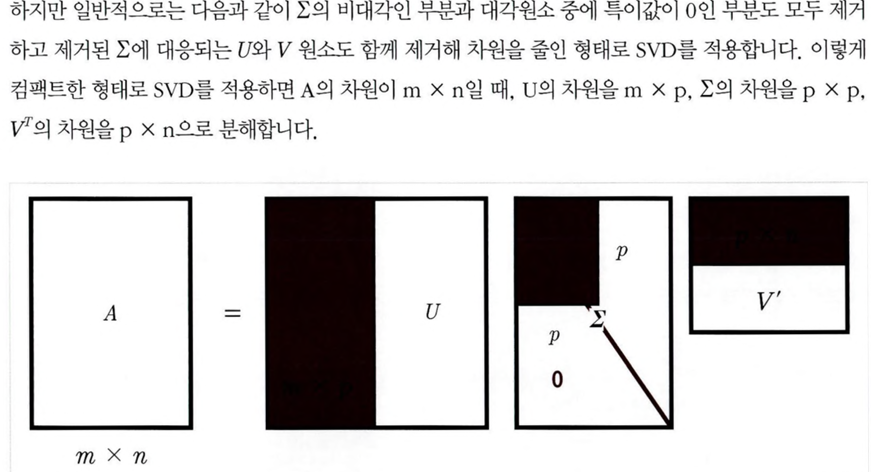

 Truncated SVD는 시그마의 대각원소 중에 상위 몇 개만 추출해서 여기에 대응하는 U와 V의 원소도 함께
제거해 더욱 차원을 줄인 형태로 분해

In [41]:
import numpy as np
from numpy.linalg import svd

np.random.seed(121)
a=np.random.randn(4,4)
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [43]:
U,Sigma,Vt=svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n',np.round(U,3))
print('Sigma Value:\n',np.round(Sigma,3)) #대각선만 1차원으로 표현됨
print('V transpose matrix:\n',np.round(Vt,3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


In [46]:
#0포함한 대칭행렬로 변환한 뒤 내적 수행해야함

Sigma_mat=np.diag(Sigma)
a_=np.dot(np.dot(U,Sigma_mat),Vt)
print(np.round(a_,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


원본행렬과 동일하게 복원

로우간 의존성이 있는경우 시그마가 어떻게 변하고 차원축소 진행될 수 있는지 보기

In [47]:
a[2]=a[0]+a[1]
a[3]=a[0]
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [48]:
U,Sigma,Vt=svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value:\n',np.round(Sigma,3))

(4, 4) (4,) (4, 4)
Sigma Value:
 [2.663 0.807 0.    0.   ]


선형 독립인 로우 벡터의 개수가 2개
라는 의미( 랭크(Rank)가 2)

복원: 시그마 0에 대응되는 데이터 제외하고 복원

In [51]:
U_=U[:,:2]
Sigma_=np.diag(Sigma[:2])
Vt_=Vt[:2]

print(U_.shape, Sigma_.shape, Vt_.shape)
a_=np.dot(np.dot(U_,Sigma_),Vt_)
print(np.round(a_,3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


 Truncated SVD를 이용해 행렬을 분해

 시그마 행렬에 있는 대각 원소 즉 특이값 중 상위 일부 데이터만 추출해 분해하는 방식/원본행렬 원복 불가 그러나 데이터 정보가 압축되어 분해됨에도 상당한 수준으로 원본 행렬을 근사할 수 있음

 사이파이 모듈 사용(넘파이 불가)

In [53]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd
#원본 행렬을 출력하고 SVD를 적용할 경우 U, Sigma, Vt의 차원 확인
np.random.seed(121)
matrix=np.random.random((6,6))
print('원본 행렬:\n',matrix)
U,Sigma,Vt=svd(matrix,full_matrices=False)
print('\n분해 행렬 차원',U.shape,Sigma.shape,Vt.shape)
print('\nSigma값 행렬:',Sigma)

#Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행
num_components=4
U_tr,Sigma_tr, Vt_tr=svds(matrix,k=num_components)
print('\nTruncated SVD 분해 행렬 차원',U_tr.shape,Sigma_tr.shape,Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬:',Sigma_tr)

matrix_tr=np.dot(np.dot(U_tr,np.diag(Sigma_tr)),Vt_tr)
print('Truncated SVD로 분해 후 복원 행렬:\n',matrix_tr)

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원 (6, 6) (6,) (6, 6)

Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원 (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]
Truncated SVD로 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231 0.6

##사이킷런 TruncatedSVD 클래스를 이용한 변환
 U, Sigma, Vt 행렬 반환X

 PCA클래스와 비슷하게 fit, transform호출해 원본 데이터를 몇개의 주요 컴포넌트 (k컴포넌트 수)로 차원을 축소해 변환

Text(0, 0.5, 'TruncatedSVD Component 2')

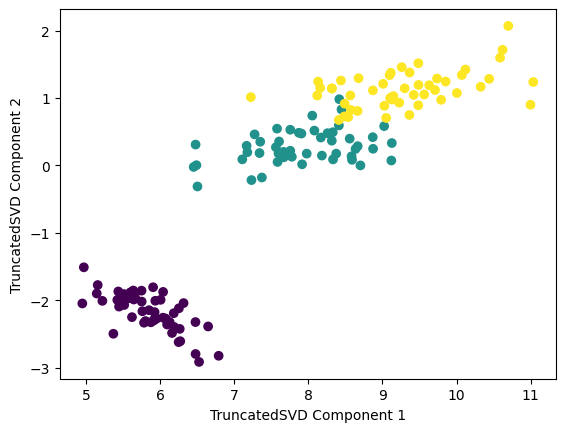

In [54]:
from sklearn.decomposition import TruncatedSVD, PCA
iris=load_iris()
iris_ftrs=iris.data

tsvd=TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd=tsvd.transform(iris_ftrs)

plt.scatter(x=iris_tsvd[:,0],y=iris_tsvd[:,1],c=iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

 TruncatedSVD 변환 역시 PCA와 유사하게 변환
후에 품종별로 어느 정도 클러스터링이 가능할 정도로 각 변환 속성으로 뛰어난 고유성을 가지고 있음

사이킷런의 TruncatedSVD와 PCA 클래스 구현을 조금 더 자세히 들여다보면 두 개 클래스 모두 SVD
를 이용해 행렬을 분해

Text(0.5, 1.0, 'PCA Transformed')

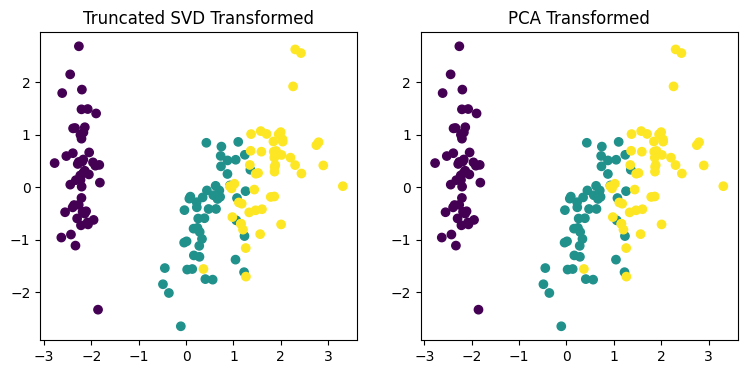

In [56]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
iris_scaled=scaler.fit_transform(iris_ftrs)
tsvd=TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd=tsvd.transform(iris_scaled)

pca=PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca=pca.transform(iris_scaled)

fig,(ax1,ax2)=plt.subplots(figsize=(9,4),ncols=2)
ax1.scatter(x=iris_tsvd[:,0],y=iris_tsvd[:,1],c=iris.target)
ax2.scatter(x=iris_pca[:,0],y=iris_pca[:,1],c=iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

In [57]:
print((iris_pca-iris_tsvd).mean())
print((pca.components_-tsvd.components_).mean())

2.3390953525955403e-15
-7.632783294297951e-17


거의 0에 가까운 값이므로 서로 동일함

즉 데이터세트가 스케일링으로 데이터 중심이 동일해지면 svd pca는 동일한 변환을 수행

 이는 PCA가
SVD 알고리즘으로 구현됐음을 의미

 하지만 PCA는 밀집 행렬(Dense Matrix)에 대한 변환만
가능하며 SVD는 희소 행렬(Sparse Matrix)에 대한 변환도 가능

#05 NMF(Non-Negative Matrix Factorization)

##NMF개요
원본 행렬 내의 모든 원소 값이 모두 양수라는 것이 보장되면 두개의 양수 행렬로 분해될 수 있는 기법

행렬 분해를 하게 되면 길고 가는 W행렬(원본 행에 대해 이 잠재 요소의 값이 얼마나 되는지에 대응)과 작고 넓은 H행렬(이 잠재요소가 원본열로 어떻게 구성되는지 나타냄)로 분해됨

이렇게 분해된 행렬은 잠재요소를 특성으로 가짐

잠재 요소 도출로 이미지 변환 및 압축 텍스트의 토픽 도출 등의 영역에서 사용

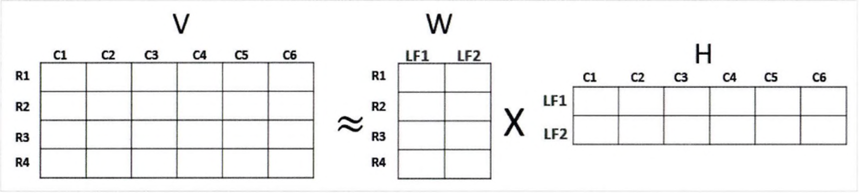

/usr/local/lib/python3.12/dist-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Text(0, 0.5, 'NMF Component 2')

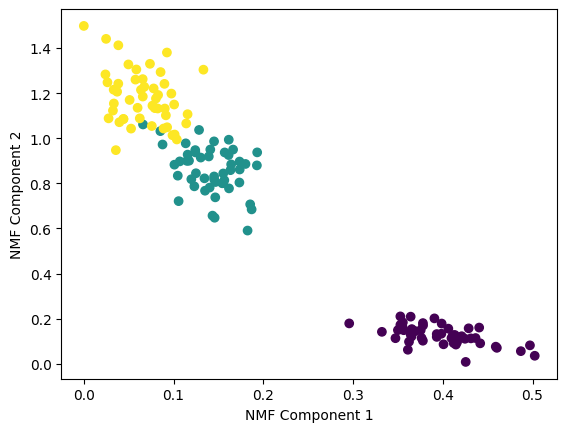

In [60]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris

nmf=NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf=nmf.transform(iris_ftrs)#nmf.transform(X)는 W 를 반환
plt.scatter(iris_nmf[:,0],iris_nmf[:,1],c=iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')


SVD와 NMF는 매우 많은 피처 데이터를 가진 고차원 행렬을 두 개의 저차원 행렬로 분리하는 행렬 분
해 기법입